In [1]:
# Pandas and Numpy to process and read the tabular data
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Reading in the original dataset
df = pd.read_csv("Dataset_Actual_val.csv", index_col="ID")

# Inspecting the general structure of the dataset
df.head()

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation,Caff,Cannabis,Meth,Semeron
ID,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,39.0,36.0,42.0,37.0,42.0,0.1883,0.0700,6,0,0,0
2,25-34,Male,Doctorate degree,29.0,52.0,55.0,48.0,41.0,0.1629,0.1183,6,4,3,0
3,35-44,Male,Professional certificate/ diploma,31.0,45.0,40.0,32.0,34.0,0.1464,0.1321,6,3,0,0
4,18-24,Female,Masters degree,34.0,34.0,46.0,47.0,46.0,0.1464,0.0700,5,2,0,0
5,35-44,Female,Doctorate degree,43.0,28.0,43.0,41.0,50.0,0.1883,0.1183,6,3,0,0


In [3]:
# Check for null values
print(df.isnull().sum())

print(df.dtypes)

Age          0
Gender       0
Education    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
Sensation    0
Caff         0
Cannabis     0
Meth         0
Semeron      0
dtype: int64
Age           object
Gender        object
Education     object
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
Sensation    float64
Caff           int64
Cannabis       int64
Meth           int64
Semeron        int64
dtype: object


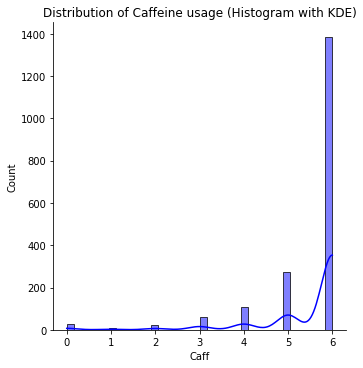

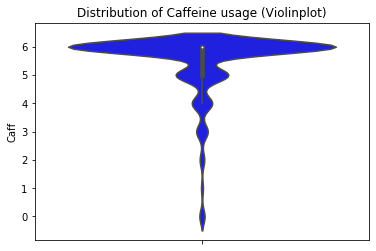

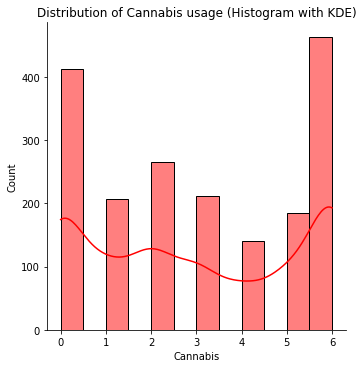

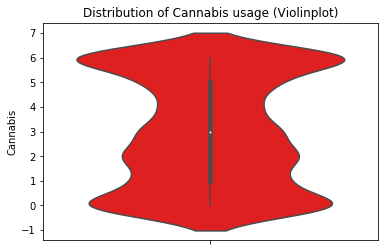

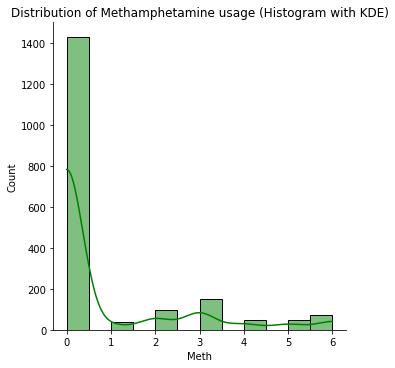

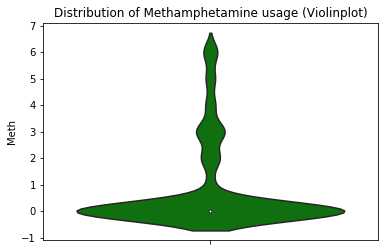

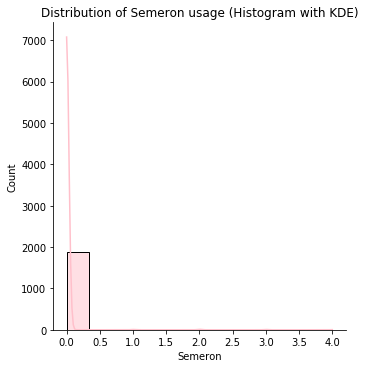

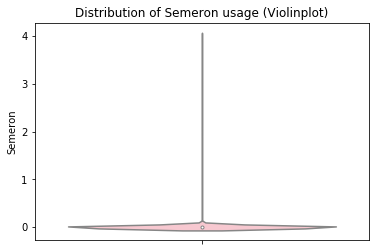

In [4]:
# Distributions of Drugs in our network

drug_list = [["Caff","blue","Caffeine"],["Cannabis","red","Cannabis"],["Meth","green","Methamphetamine"],["Semeron","Pink","Semeron"]]

for drug, color, name in drug_list:
        
    sns.displot(df[drug],color=color,kde=True)
    plt.title("Distribution of " + str(name) + " usage (Histogram with KDE)")
    plt.show()

    sns.violinplot(y=df[drug],color=color)
    plt.title("Distribution of " + str(name) + " usage (Violinplot)")
    plt.show()

# Here we encounter a big problem --> Semeron is HUGELY under represented

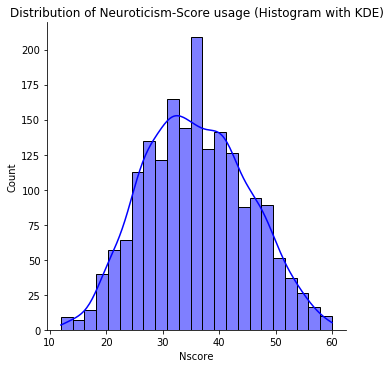

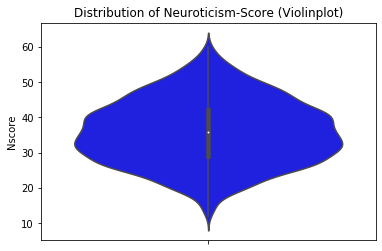

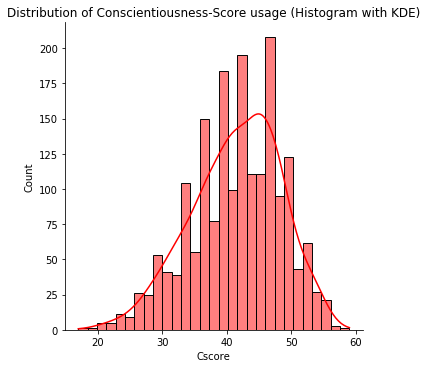

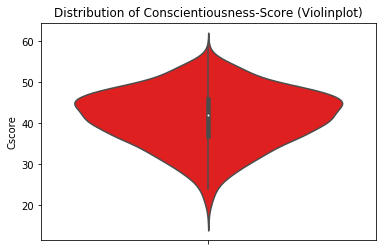

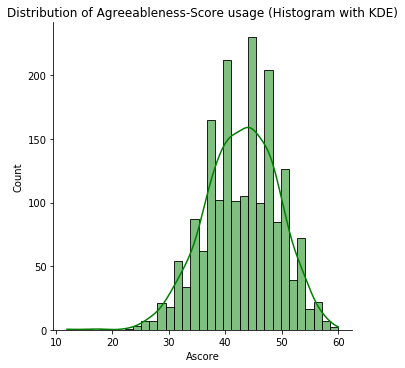

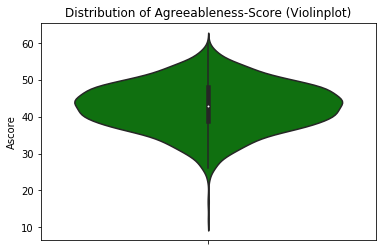

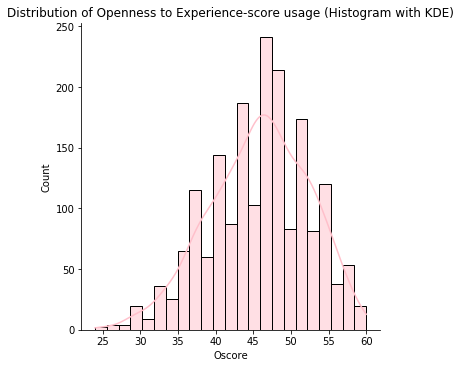

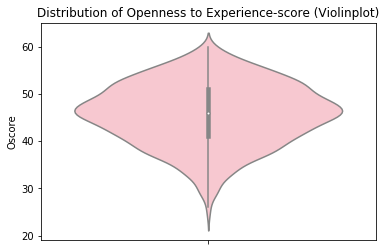

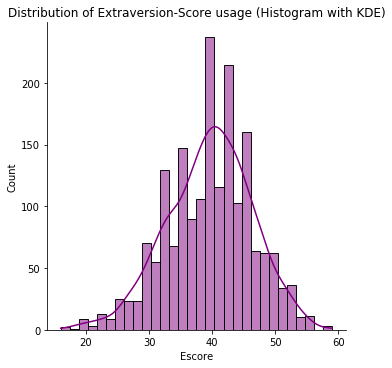

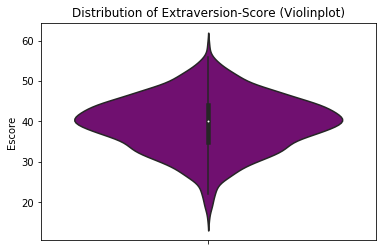

In [5]:
# Distributions of "Big Five" personality scores

# Distributions of Drugs in our network

big5_list = [["Nscore","blue","Neuroticism-Score"],["Cscore","red","Conscientiousness-Score"],["Ascore","green","Agreeableness-Score"],["Oscore","Pink","Openness to Experience-score"],["Escore","purple","Extraversion-Score"]]

for score, color, name in big5_list:
    
    sns.displot(df[score],color=color,kde=True)
    plt.title("Distribution of " + str(name) + " usage (Histogram with KDE)")
    plt.show()

    sns.violinplot(y=df[score],color=color)
    plt.title("Distribution of " + str(name) + " (Violinplot)")
    plt.show()

# This looks pretty normally distributed which is probably a good thing!

Integer column relationships in dataset


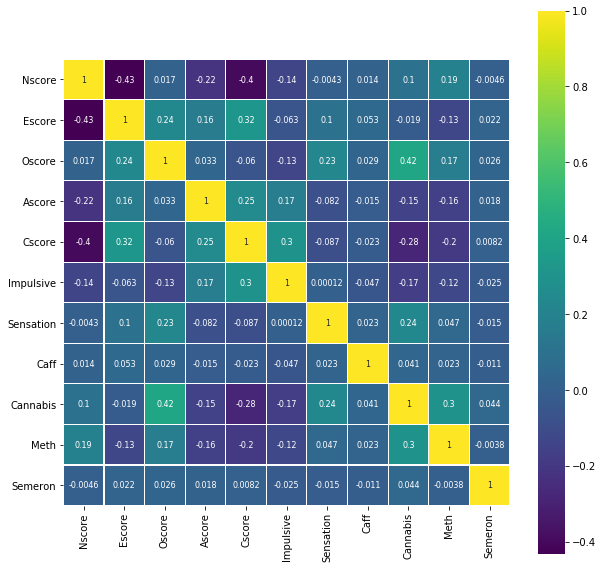

(Strongest) Integer column relationships in dataset


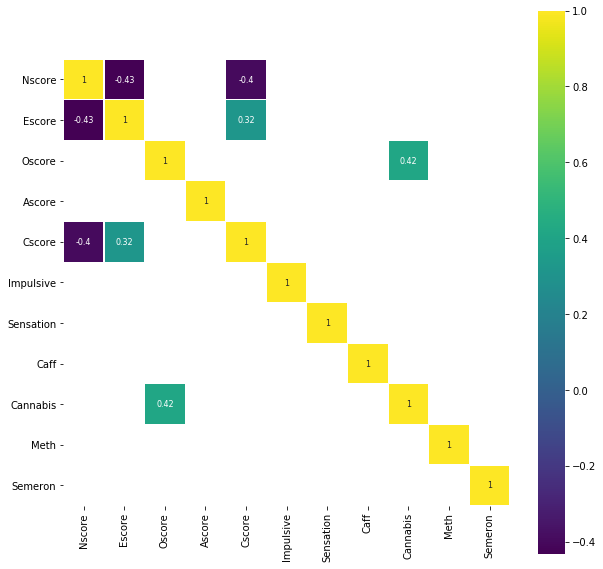

In [6]:
numerical_cols = df.select_dtypes(include = ['float64', 'int64'])
corr = numerical_cols.corr()

print("Integer column relationships in dataset")

fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr,cmap="viridis",vmax=1.0,linewidths=0.1,annot=True,annot_kws={"size": 8},square=True,ax=ax)
plt.show()

print("(Strongest) Integer column relationships in dataset")

fig, ax1 = plt.subplots(figsize=(10,10))  

sns.heatmap(corr[(corr>=0.3) | (corr <= -0.3)],cmap="viridis",vmax=1.0,linewidths=0.1,annot=True,annot_kws={"size": 8},square=True,ax=ax1)
plt.show()

In [7]:
drug_list = ["Caff","Cannabis","Meth","Semeron"]

for drug in drug_list:
    
    df_encoded = pd.get_dummies(df)

    y = df_encoded[drug]
    X = df_encoded.drop([drug],axis=1)

    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Attributes','Score']  

    # Print 10 best features
    print("10 most expressive features about the following drug: " + str(drug))
    print(featureScores.nlargest(10,'Score'))
    print("___________________________________________________________________")

10 most expressive features about the following drug: Caff
                                 Attributes      Score
7                                  Cannabis  47.252282
10                                Age_18-24  41.800324
13                                Age_45-54  30.192323
2                                    Oscore  15.954266
9                                   Semeron  12.994917
15                                  Age_65+  12.816766
18  Education_College or university dropout  11.767903
1                                    Escore  10.846274
24                 Education_Masters degree  10.805384
12                                Age_35-44   9.957212
___________________________________________________________________
10 most expressive features about the following drug: Cannabis
                                 Attributes       Score
8                                      Meth  616.923363
2                                    Oscore  316.354915
10                                Age